In [7]:
from sklearn.datasets import make_classification

import TrainCat
import TrainLog

In [2]:
SEED = 12

In [3]:
X, y = make_classification(
    n_samples=4000, n_classes=2,
    n_features=20, n_informative=18,
    random_state=SEED)

100%|█████████| 10/10 [00:14<00:00,  1.44s/trial, best loss: -0.940166537470931]


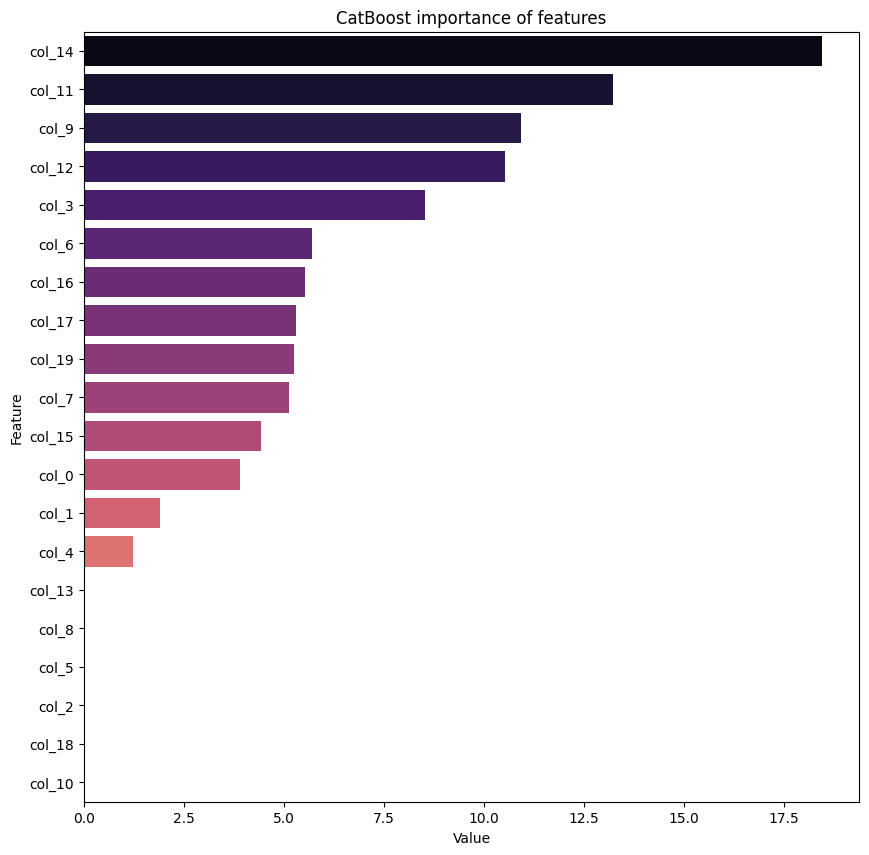

In [4]:
model, cv_score, best_score = TrainCatBoostModel(
    X[:2000], y[:2000], X[2000:], y[:2000], random_seed=SEED
).train()

In [5]:
X = pd.DataFrame(X)

X.columns = [f'Col {i}' for i in X.columns]

FS_obj = FeatureSelector(
    X[:2000], y[:2000], X[2000:], y[:2000], random_state=SEED, cat_features=[]
)

# allowed_decrease - обрати внимание на этот параметр!!!
FS_obj.backward_selector(allowed_decrease=0)

0.71 1.04 0.71 1.04 -inf -inf
Columns remaining 18
0.9 1.0 0.9 1.0 0.71 1.04
Starting feature stability testing


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.12it/s]


11 potential columns to drop
0.66 0.74 0.66 0.74 0.71 1.04
Not stable columns is not bad


(array(['Col 14', 'Col 12', 'Col 11', 'Col 9', 'Col 15', 'Col 2', 'Col 5',
        'Col 10', 'Col 13', 'Col 6', 'Col 4', 'Col 17', 'Col 19', 'Col 7',
        'Col 16', 'Col 8', 'Col 18', 'Col 1', 'Col 3', 'Col 0'],
       dtype='<U6'),
 [array(['Col 0', 'Col 1', 'Col 2', 'Col 3', 'Col 4', 'Col 5', 'Col 6',
         'Col 7', 'Col 8', 'Col 9', 'Col 10', 'Col 11', 'Col 12', 'Col 13',
         'Col 14', 'Col 15', 'Col 16', 'Col 17', 'Col 18', 'Col 19'],
        dtype=object)])

In [6]:
params = {
    'iterations': 1,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC'
}

FS_obj.forward_selector(
    target='target',
    params=params,
    n_stop=30
)

100%|█████████████████████████████████████████████| 9/9 [00:01<00:00,  7.14it/s]


,Feature name,AUC Train,AUC Val,Delta AUC Train,Delta AUC Val
0,Col 14,0.604353,0.614204,NaN,NaN
1,Col 11,0.655275,0.641892,0.050921,0.027688
2,Col 9,0.673296,0.652968,0.018022,0.011076
3,Col 12,0.664908,0.648700,-0.008388,-0.004267
4,Col 5,0.679517,0.652837,0.014608,0.004137
5,Col 2,0.686675,0.647426,0.007158,-0.005411
6,Col 15,0.679758,0.655875,-0.006917,0.008448
7,Col 10,0.691599,0.671207,0.011841,0.015332
8,Col 13,0.674500,0.651386,-0.017099,-0.019820


100%|████████| 10/10 [00:01<00:00,  5.78trial/s, best loss: -0.9074791828161336]


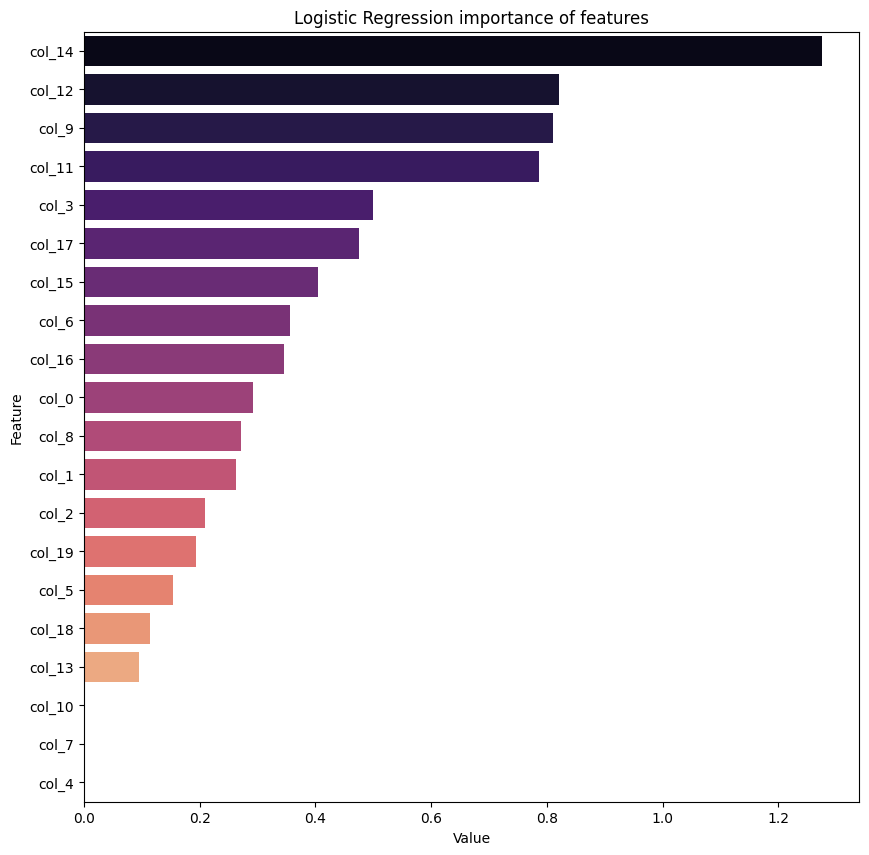

In [4]:
model, cv_score, best_score = TrainLogisticRegressionModel(
    X[:2000], y[:2000], X[2000:], y[:2000], random_seed=SEED
).train()

In [10]:
X = pd.DataFrame(X)

X.columns = [f'Col {i}' for i in X.columns]

FS_obj = TrainLog.FeatureSelectorLR(
    X[:2000], y[:2000], X[2000:], y[:2000], random_state=SEED
)

# allowed_decrease - обрати внимание на этот параметр!!!
FS_obj.backward_selector(allowed_decrease=0)

0.88 0.94 0.88 0.94 -inf -inf
Columns remaining 18
0.88 0.94 0.88 0.94 0.88 0.94
Columns remaining 16
0.88 0.94 0.88 0.94 0.88 0.94
Columns remaining 14
0.88 0.93 0.88 0.93 0.88 0.94
Starting feature stability testing


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 122.40it/s]

1 potential columns to drop
0.66 0.74 0.66 0.74 0.88 0.94
Not stable columns is not bad


(array(['Col Col Col Col Col 14', 'Col Col Col Col Col 12',
        'Col Col Col Col Col 11', 'Col Col Col Col Col 9',
        'Col Col Col Col Col 3', 'Col Col Col Col Col 17',
        'Col Col Col Col Col 15', 'Col Col Col Col Col 16',
        'Col Col Col Col Col 2', 'Col Col Col Col Col 5',
        'Col Col Col Col Col 1', 'Col Col Col Col Col 13',
        'Col Col Col Col Col 8', 'Col Col Col Col Col 6'], dtype='<U22'),
 [array(['Col Col Col Col Col 0', 'Col Col Col Col Col 1',
         'Col Col Col Col Col 2', 'Col Col Col Col Col 3',
         'Col Col Col Col Col 4', 'Col Col Col Col Col 5',
         'Col Col Col Col Col 6', 'Col Col Col Col Col 7',
         'Col Col Col Col Col 8', 'Col Col Col Col Col 9',
         'Col Col Col Col Col 10', 'Col Col Col Col Col 11',
         'Col Col Col Col Col 12', 'Col Col Col Col Col 13',
         'Col Col Col Col Col 14', 'Col Col Col Col Col 15',
         'Col Col Col Col Col 16', 'Col Col Col Col Col 17',
         'Col Col Col Col Col 18